<a href="https://colab.research.google.com/github/evelynmmartinez/Data-Science-Project/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
- Author: Evelyn Martinez

## CRISP-DM Phase 1 - Data Understanding

The goal is to help Big Mart understand the properties of products and outlets that play crucial roles in increasing sales.

## CRISP-DM Phase 2 - Data Understanding & Phase 3 - Data Preparation

In [622]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import set_config
set_config(transform_output='pandas')
import warnings
warnings.filterwarnings('ignore')

## Load and Inspect Data

In [624]:

fname = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week01/Data/sales_predictions_2023.csv"
df = pd.read_csv(fname)

In [505]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [507]:
df.shape

(8523, 12)

### Display Options

In [623]:
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', -1)

In [509]:
duplicated_rows = df.duplicated()



In [510]:
df.duplicated().sum()

0

*No duplicated rows.

##Clean Data

In [625]:
#Identifying missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [512]:
print(f'There are {df.isna().sum().sum()} missing values.')

There are 3873 missing values.


In [628]:
cat_cols = df.select_dtypes('object').columns


Index(['Item_Identifier',
       'Item_Fat_Content',
       'Item_Type',
       'Outlet_Identifier',
       'Outlet_Size',
       'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [630]:
num_cols = df.select_dtypes('number').columns


Index(['Item_Weight',
       'Item_Visibility',
       'Item_MRP',
       'Outlet_Establishment_Year',
       'Item_Outlet_Sales'],
      dtype='object')

In [627]:
obj_columns = df.select_dtypes("object").columns


Index(['Item_Identifier',
       'Item_Fat_Content',
       'Item_Type',
       'Outlet_Identifier',
       'Outlet_Size',
       'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [631]:
#Inspecting Inconsistencies in data for categorical columns
for col in obj_columns:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
FDV60     9
NCQ06     9
FDF52     9
FDX04     9
NCJ30     9
FDV38     9
NCF42     9
FDT07     9
FDW26     9
NCL31     9
FDU12     9
FDG09     9
FDQ40     9
FDX20     9
NCI54     9
FDX31     9
FDP25     9
FDW49     9
FDF56     9
FDO19     9
DRN47     9
NCB18     9
FDE11     8
NCX05     8
FDQ39     8
FDT55     8
FDO32     8
FDT40     8
FDZ20     8
FDH27     8
FDY49     8
FDS33     8
FDR04     8
FDR43     8
FDR59     8
FDJ55     8
FDT24     8
FDY55     8
FDV09     8
FDU23     8
FDY47     8
DRD25     8
FDK58     8
FDL58     8
FDX58     8
FDR44     8
FDP28     8
FDA39     8
FDH28     8
DRF27     8
FDX21     8
FDY56     8
FDF05     8
FDL20     8
FDY03     8
NCK05     8
FDS55     8
DRA59     8
FDG24     8
NCE54     8
FDZ21     8
FDA04     8
FDW24     8
FDT49     8
DRF23     8
FDD05     8
FDH10     8
FDX50     8
FDT32     8
FDK20     8
FDU13     8
FDN56     8
FDZ26     8
FDL34     8
DRF01     8
FDG38  

In [522]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':"Low Fat", "reg":"Regular", "low fat":"Low Fat"})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [523]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [524]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [525]:
for col in obj_columns:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
FDV60     9
NCQ06     9
FDF52     9
FDX04     9
NCJ30     9
FDV38     9
NCF42     9
FDT07     9
FDW26     9
NCL31     9
FDU12     9
FDG09     9
FDQ40     9
FDX20     9
NCI54     9
FDX31     9
FDP25     9
FDW49     9
FDF56     9
FDO19     9
DRN47     9
NCB18     9
FDE11     8
NCX05     8
FDQ39     8
FDT55     8
FDO32     8
FDT40     8
FDZ20     8
FDH27     8
FDY49     8
FDS33     8
FDR04     8
FDR43     8
FDR59     8
FDJ55     8
FDT24     8
FDY55     8
FDV09     8
FDU23     8
FDY47     8
DRD25     8
FDK58     8
FDL58     8
FDX58     8
FDR44     8
FDP28     8
FDA39     8
FDH28     8
DRF27     8
FDX21     8
FDY56     8
FDF05     8
FDL20     8
FDY03     8
NCK05     8
FDS55     8
DRA59     8
FDG24     8
NCE54     8
FDZ21     8
FDA04     8
FDW24     8
FDT49     8
DRF23     8
FDD05     8
FDH10     8
FDX50     8
FDT32     8
FDK20     8
FDU13     8
FDN56     8
FDZ26     8
FDL34     8
DRF01     8
FDG38  

## Exploratory Data Analysis

### Histogram of numerical Features

In [526]:
num_cols =df.select_dtypes('number').columns
num_cols

Index(['Item_Weight',
       'Item_Visibility',
       'Item_MRP',
       'Outlet_Establishment_Year',
       'Item_Outlet_Sales'],
      dtype='object')

In [527]:
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier',
       'Item_Fat_Content',
       'Item_Type',
       'Outlet_Identifier',
       'Outlet_Size',
       'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

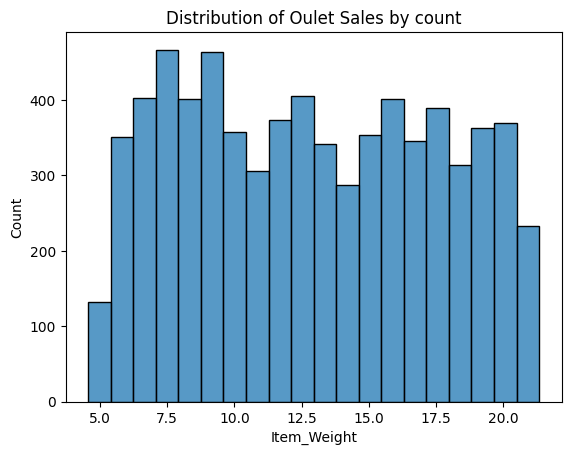

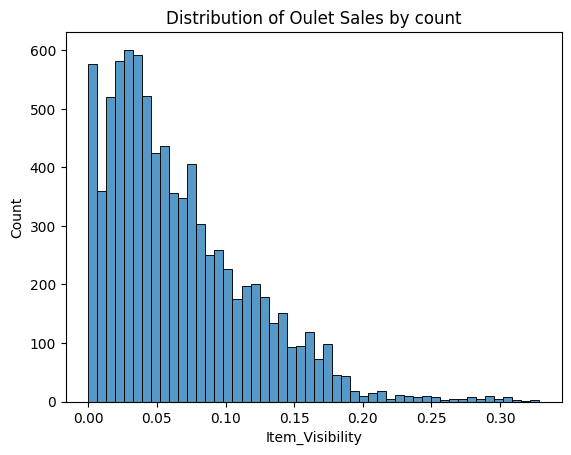

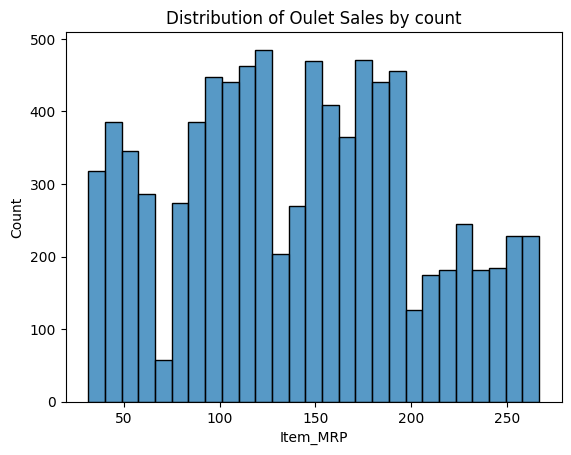

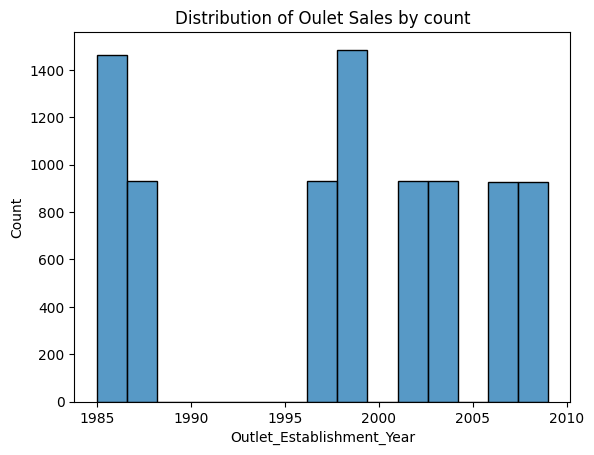

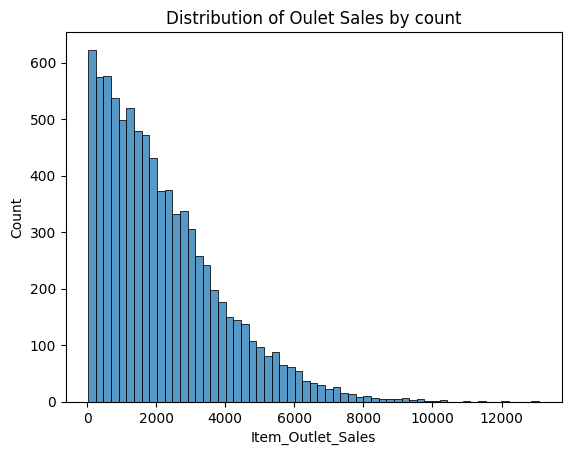

In [528]:
num_cols = df.select_dtypes(include='number')

for column in num_cols.columns:
    plt.figure()
    sns.histplot(data=num_cols,
                 x=column),


    plt.title(f"Distribution of Oulet Sales by count")
    plt.xlabel(column)
    plt.ylabel("Count");


###Box plot of Numerical Figures

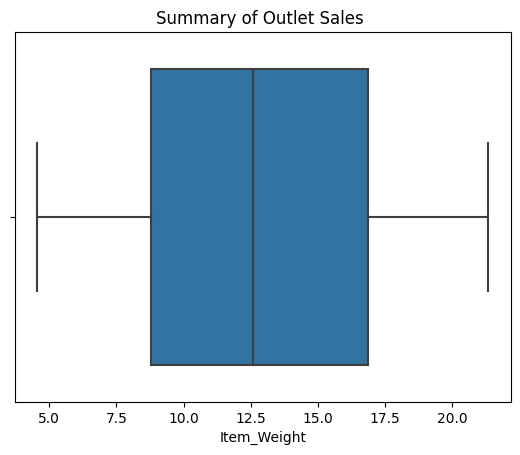

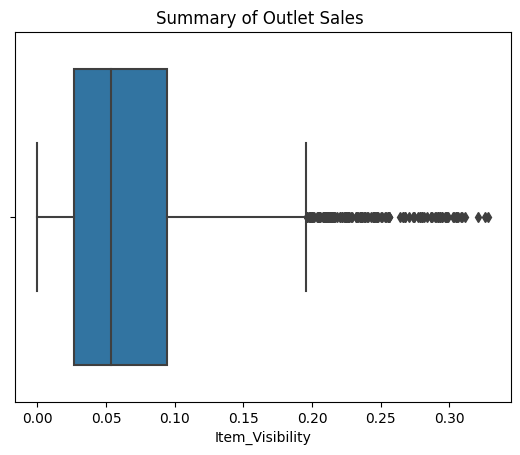

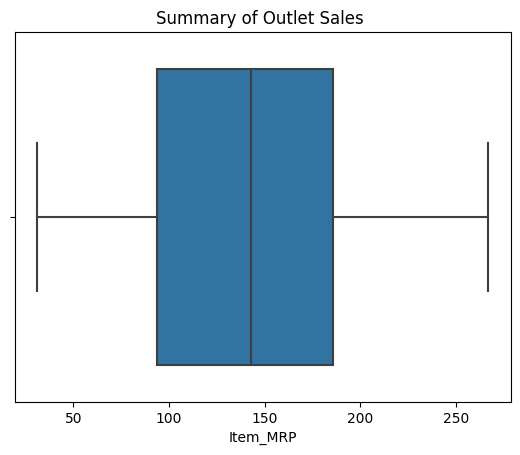

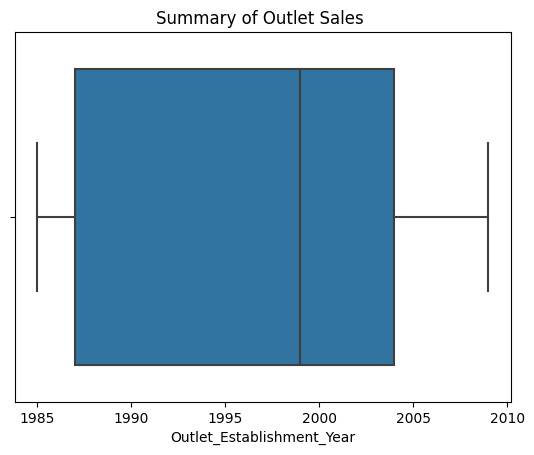

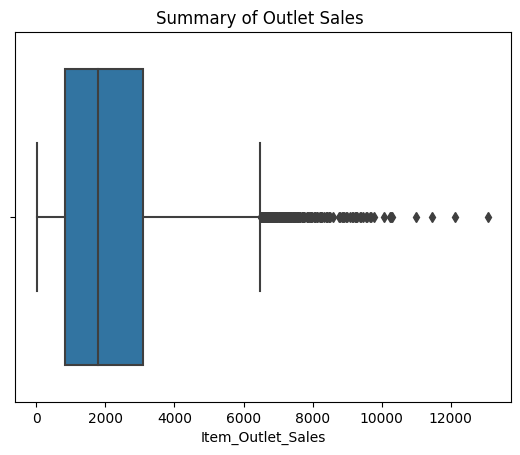

In [529]:
num_cols = df.select_dtypes(include='number')

for column in num_cols.columns:
    plt.figure()
    sns.boxplot(data=num_cols,
                x= column)

    plt.title(f"Summary of Outlet Sales ")
    plt.xlabel(column)


##Countplot in Categotical Feautures

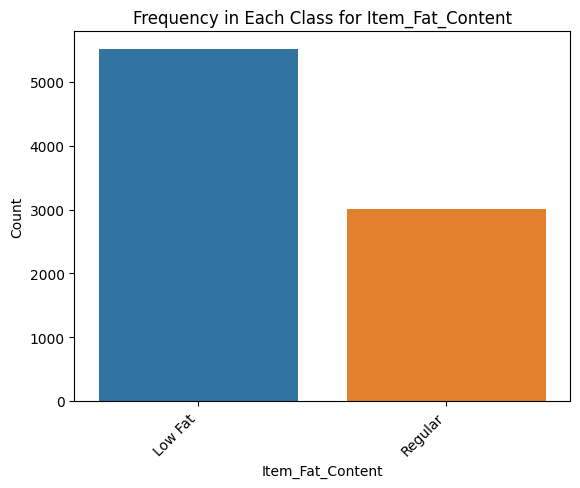

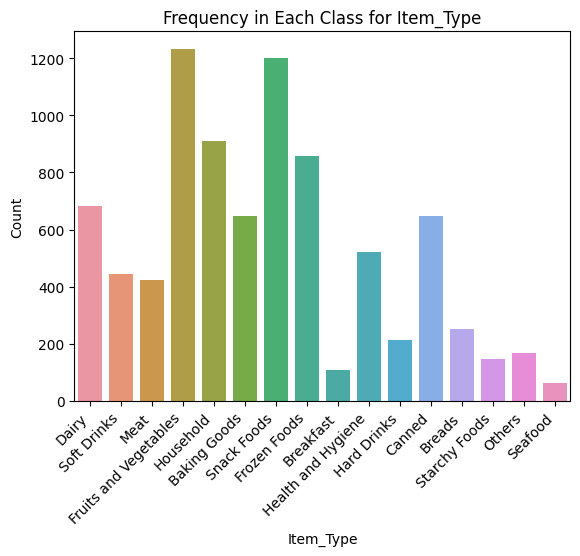

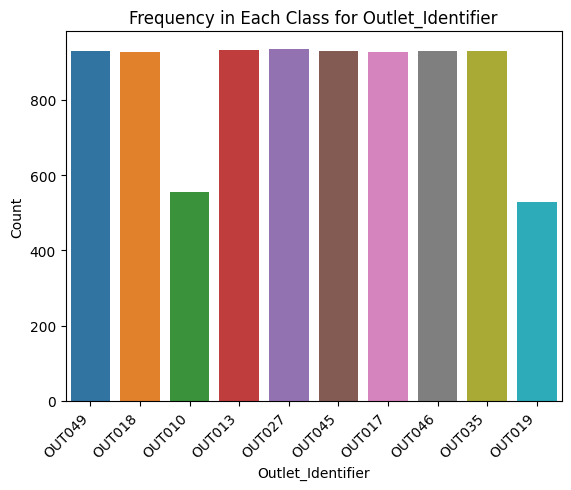

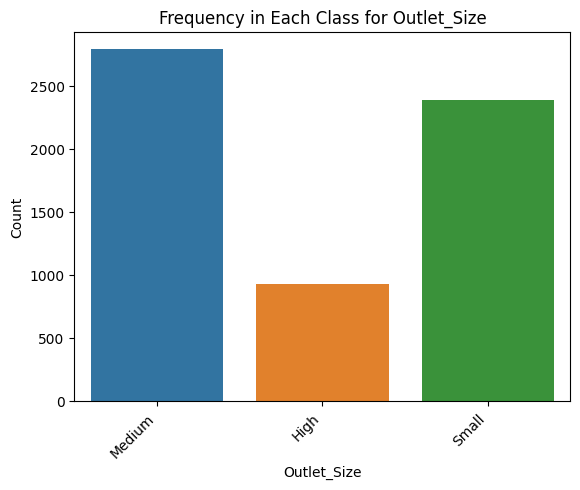

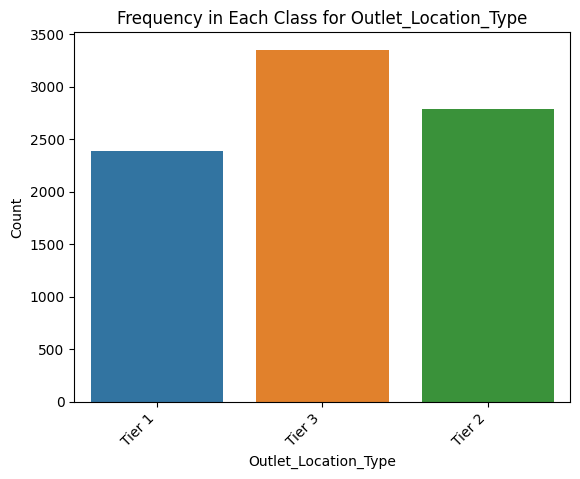

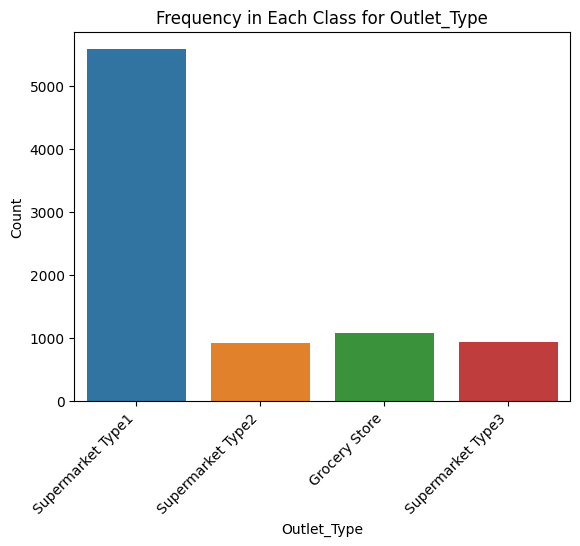

In [530]:
obj_columns = df.select_dtypes("object").columns

for column in obj_columns:
    if column != "Item_Identifier":
        plt.figure()
        ax = sns.countplot(data=df, x=column)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        plt.title(f"Frequency in Each Class for {column}")
        plt.xlabel(column)
        plt.ylabel("Count")

plt.show()

##Correlation Heatmap in Categorical Features

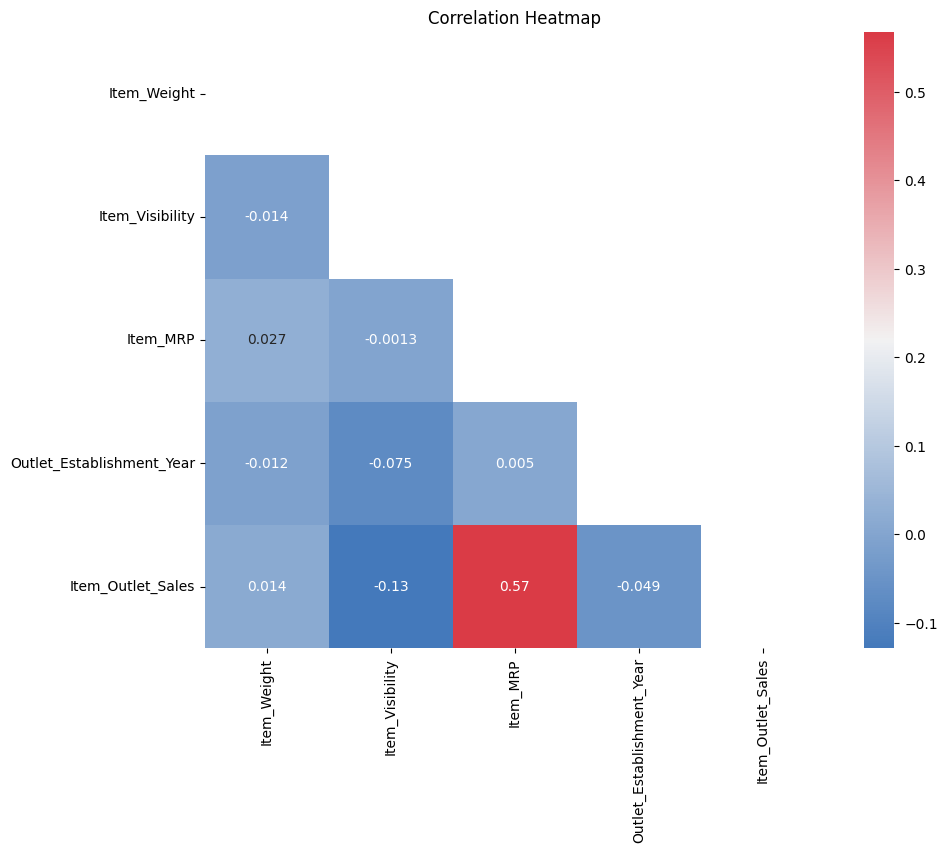

In [531]:
corr = df.corr()
mask = np.triu(np.ones_like(corr))
cmap = sns.diverging_palette(250, 10, as_cmap=True)

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr, cmap=cmap, annot=True, mask=mask)


plt.title("Correlation Heatmap");


In [532]:
corr = df.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.03,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.03,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


#####Feature Inspection

In [533]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [536]:
temp_df = df.copy()

In [537]:
df[cat_cols].nunique()

Item_Identifier         1559
Item_Fat_Content           2
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [538]:
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4),order = None):
  temp_df = df.copy()

  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  fig, ax = plt.subplots(figsize=figsize)
  sns.countplot(data=temp_df, x=x, ax=ax)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  ax.set_title(f"{x}")
  fig.tight_layout()
  return fig, ax



In [539]:
def explore_numeric(df, col, fillna=False, placeholder=None, show_outliers=True):
    temp_df = df.copy()

    if fillna:
        temp_df[col] = temp_df[col].fillna(placeholder)

    fig, axes = plt.subplots(nrows=2, figsize=(10, 5), sharex=True)

    sns.histplot(data=temp_df, x=col, ax=axes[0])
    mean_value = temp_df[col].mean()
    axes[0].axvline(mean_value, color='red', ls='--', label=f"Mean = {mean_value:,.2f}")

    med_value = temp_df[col].median()
    axes[0].axvline(med_value, color='black', ls='--', label=f"Median = {med_value:,.2f}")

    if show_outliers:
        sns.boxplot(data=temp_df, x=col, ax=axes[1], showfliers=True)
    else:
        sns.boxplot(data=temp_df, x=col, ax=axes[1], showfliers=False)

    axes[0].set_title(f'Numeric Distribution of {col}')
    axes[0].set_xlabel(col)
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()


In [540]:
def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales',
                           figsize=(6,4)):

  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  plt.show()

  return fig, ax

### Item_Fat_Content

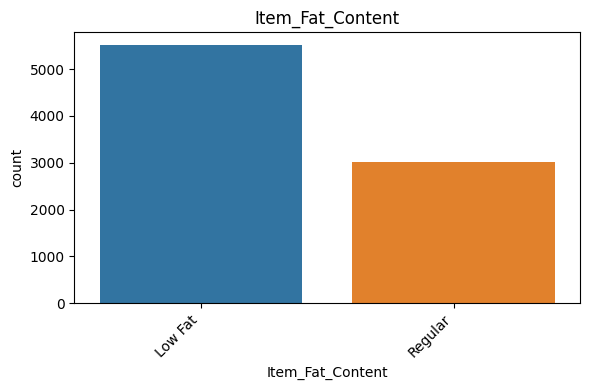

In [541]:
explore_categorical(df, 'Item_Fat_Content', fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (ordinal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (2.6%)
  -

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 2 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

### Item_Type

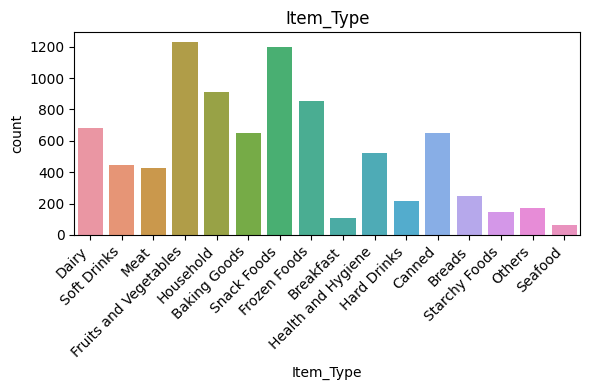

In [542]:
explore_categorical(df,'Item_Type', fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (ordinal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 16 null values (2.6%)
  -

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 16 unique categories.
  - high cardinality (>10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

### Outlet_Identifier

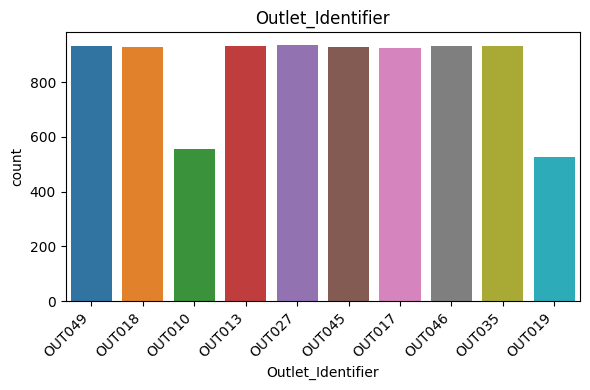

In [543]:
explore_categorical(df, 'Outlet_Identifier', fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (ordinal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values
  -

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 10 unique categories.
  - high cardinality (>10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

### Outlet_Establishment_Year

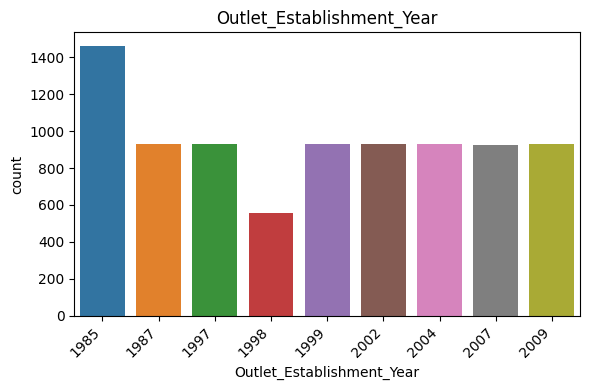

In [544]:
explore_categorical(df, 'Outlet_Establishment_Year', fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values
  -

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 9 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

### Outlet_Size

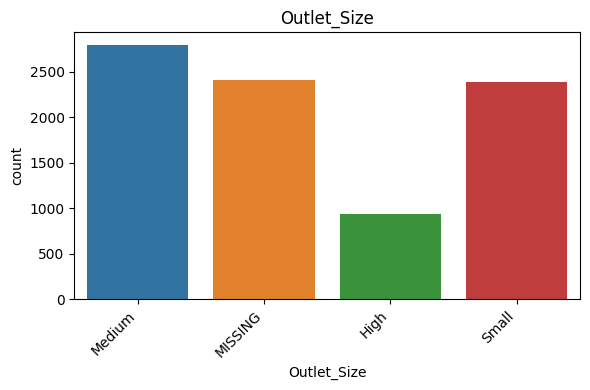

In [545]:
explore_categorical(df, 'Outlet_Size', fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (ordinal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2410 null values (28.28%)
  -

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 4 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

### Outlet_Location_Type

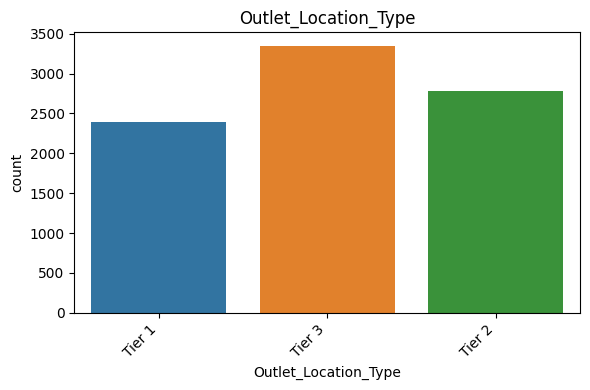

In [546]:
explore_categorical(df, 'Outlet_Location_Type', fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (ordinal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values
  -

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 3 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

### Outlet_Type

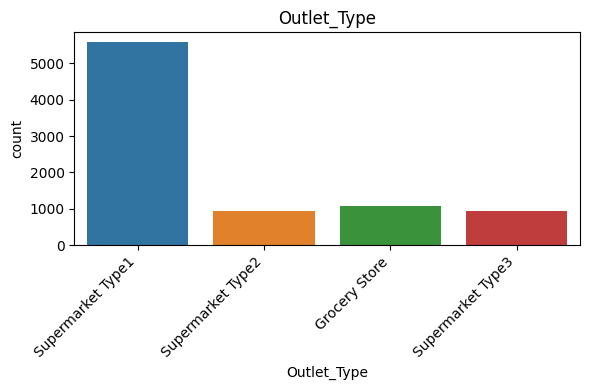

In [547]:
explore_categorical(df, 'Outlet_Type', fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (ordinal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values
  -

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 4 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

### Item_weight

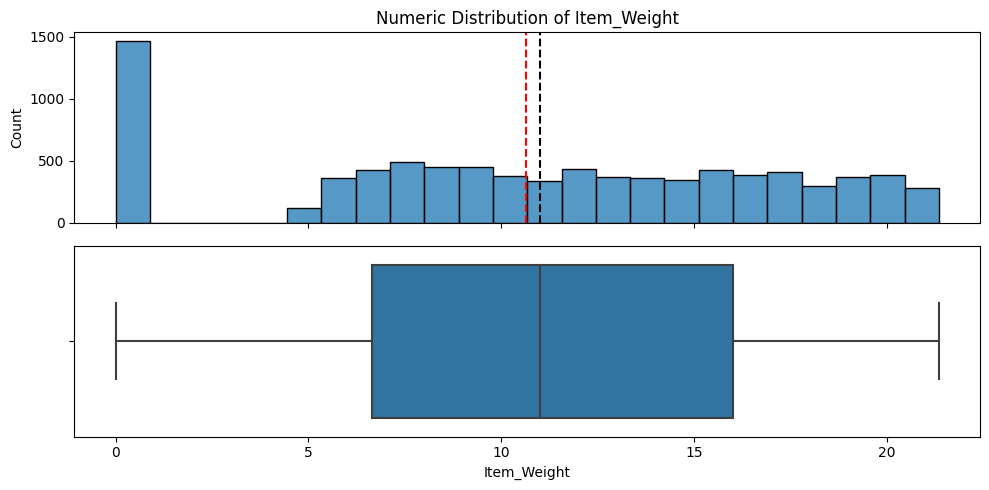

In [548]:
explore_numeric(df, 'Item_Weight', fillna=True, placeholder=0, show_outliers=False)

###Item_Visibility

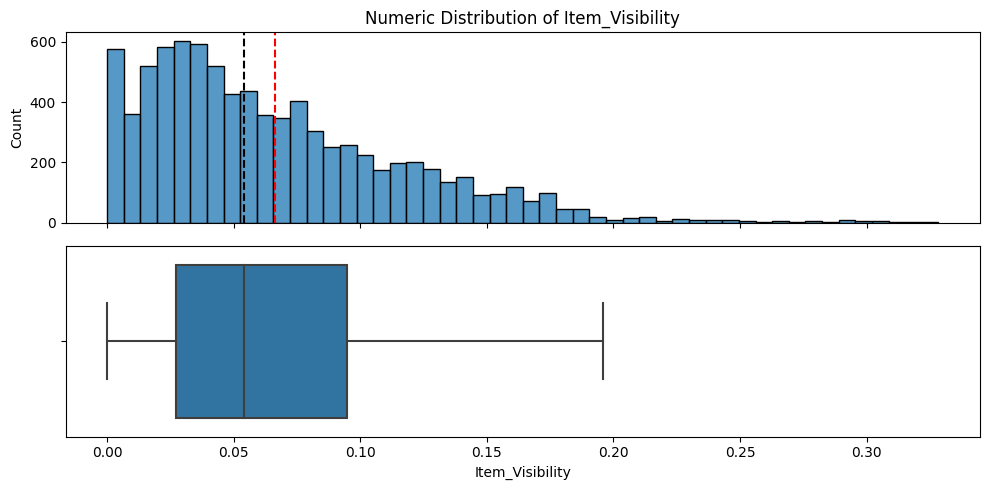

In [549]:
explore_numeric(df, 'Item_Visibility', fillna=True, placeholder=0, show_outliers=False)

### Item_MRP

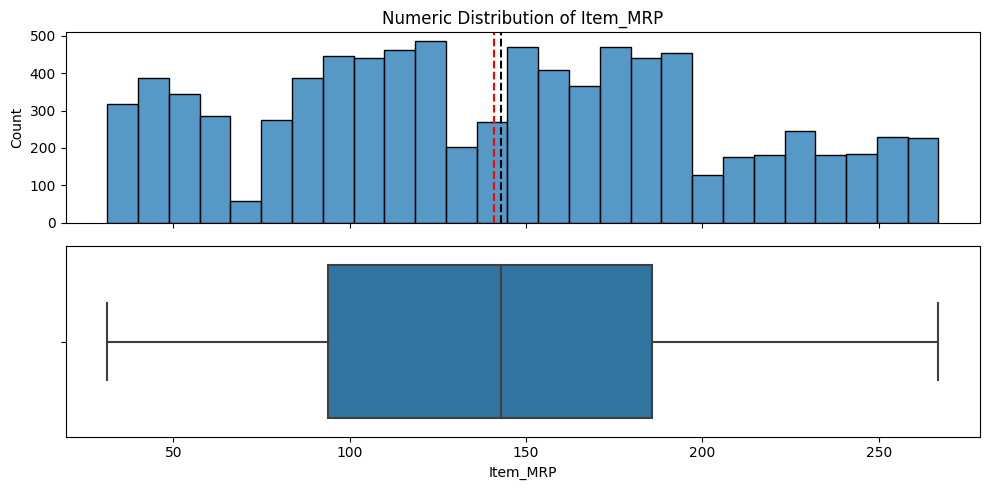

In [550]:
explore_numeric(df, 'Item_MRP', fillna=True, placeholder=0, show_outliers=False)

### Preprocess Data for Machine Learning

In [551]:
#Imports
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.pipeline import make_pipeline

from sklearn import set_config
set_config(display='diagram')

In [552]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQC6_OI9IXkr3hoWB80OAF58ofOsgSAyyhv4Nk7ACn9_g08N3-hkb9_b46YkoCfpfBiFQ0IxCAGg6zQ/pub?output=csv'
df2 = pd.read_csv(url)
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [553]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [554]:
ml_df = df2.copy()

In [555]:
ml_df.duplicated().sum()

0

In [556]:
ml_df.isna().sum().sum()

3873

In [557]:
ml_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [558]:
ml_df.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [559]:
ml_df.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [560]:
ml_df = ml_df.drop('Item_Identifier', axis=1)

In [561]:
obj_col = ml_df.select_dtypes("object").columns
obj_col

Index(['Item_Fat_Content',
       'Item_Type',
       'Outlet_Identifier',
       'Outlet_Size',
       'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [562]:
num_col = ml_df.select_dtypes("number").columns
num_col

Index(['Item_Weight',
       'Item_Visibility',
       'Item_MRP',
       'Outlet_Establishment_Year',
       'Item_Outlet_Sales'],
      dtype='object')

Checking for inconsitencies

In [563]:
for col in obj_col:
  print(f"Value Counts for {col}")
  print(ml_df[col].value_counts())
  print('\n')

Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


Value Counts for Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, 

In [564]:
ml_df['Item_Fat_Content'] = ml_df['Item_Fat_Content'].replace({'LF':"Low Fat", "reg":"Regular", "low fat":"Low Fat"})
ml_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [565]:
ml_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [566]:

ml_df['Outlet_Location_Type'].value_counts()


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [567]:
ml_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

## CRISP-DM Phase 4 - Modeling

In [568]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [569]:

target = 'Item_Outlet_Sales'
X = ml_df.drop(columns=[target]).copy()
y = ml_df[target].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30 , random_state=42)

In [570]:
X_train.shape

(5966, 10)

In [571]:
X_test.shape

(2557, 10)

In [572]:
X_train.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

#### Building pipelines for models

In [573]:
num_cols = X_train.select_dtypes('number').columns
print("Numeric Columns:", num_cols)


mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()


num_pipeline = make_pipeline(mean_imputer, scaler)
num_pipeline



Numeric Columns: Index(['Item_Weight',
       'Item_Visibility',
       'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [574]:
numeric_tuple = ('numeric',num_pipeline, num_cols)
numeric_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight',
        'Item_Visibility',
        'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

In [575]:

ord_cols = ['Outlet_Size', 'Outlet_Location_Type']


Outlet_size_list = ['Small', 'Medium', 'High']
Outlet_loc_size_list = ['Tier 1', 'Tier 2', 'Tier 3']



ord = OrdinalEncoder(categories=[Outlet_size_list, Outlet_loc_size_list])
freq_imputer = SimpleImputer(strategy='most_frequent')

scaler2 = StandardScaler()

ord_pipeline = make_pipeline(freq_imputer, ord, scaler2)

ord_tuple = ('ordinal',ord_pipeline, ord_cols)

In [576]:

num_cols = ['color']

nom_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns


missing_imputer = SimpleImputer(strategy='constant', fill_value='missing')
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

nom_pipeline = make_pipeline(missing_imputer , ohe)

nom_tuple = ('Nominal',nom_pipeline, nom_cols)

In [577]:

preprocessor = ColumnTransformer([numeric_tuple,
                                       ord_tuple,
                                       nom_tuple],
                                       remainder='drop', verbose_feature_names_out=False)


Fit the column transformer on the training Data only

In [578]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight',
       'Item_Visibility',
       'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categ...
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Outlet_Location_Type']),
                                ('Nominal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['Item_Fat_Content',
       'Item_Type',
       'Outlet_Identifier',
       'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [579]:

from sklearn import set_config
set_config(transform_output='pandas')

In [580]:
X_train_proc = preprocessor.transform(X_train)
X_test_proc = preprocessor.transform(X_test)

In [581]:
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):

  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:

    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):

  y_train_pred = reg.predict(X_train)

  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  y_test_pred = reg.predict(X_test)
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    results_df = results_df.set_index('Label')
    results_df.index.name=None
    return results_df.round(3)

In [582]:
X_train_tf = preprocessor.transform(X_train)
X_test_tf = preprocessor.transform(X_test)
X_train_tf.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
1921,-1.237957,1.606681,-0.401895,0.015833,0.284752,1.083627,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
655,1.616571,-1.008442,-0.619284,-0.103437,-1.384039,-1.383428,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2229,0.000000,-0.227068,-0.202535,-1.534680,0.284752,1.083627,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2537,1.521657,1.028038,1.290187,0.492914,0.284752,-0.149901,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3528,1.284373,0.515355,0.686853,-1.296139,1.953543,1.083627,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Linear Regression Model

In [613]:

lin_reg = LinearRegression()
lin_reg_pipe = make_pipeline(preprocessor, lin_reg)

lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight',
       'Item_Visibility',
       'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  (...
                                                   'Outlet_Location_Type']),
                                                 ('Nominal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['Item_Fat_Content',
       'Item_Type',
       'Outlet_Identifier',
       'Outlet_Type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [615]:
lin_reg_scores = evaluate_regression(lin_reg_pipe,X_train,y_train,X_test,y_test )

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.668
- MSE = 1,298,672.844
- RMSE = 1,139.593
- R^2 = 0.561

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 810.408
- MSE = 1,210,349.624
- RMSE = 1,100.159
- R^2 = 0.568


### Decision Tree

In [616]:
dec_tree = DecisionTreeRegressor(random_state = 42)
lin_reg_pipe = make_pipeline(preprocessor, dec_tree)
dec_tree.fit(X_train_tf, y_train)
dec_tree_scores= evaluate_regression(dec_tree, X_train_tf, y_train, X_test_tf, y_test)



------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 0.000
- MSE = 0.000
- RMSE = 0.000
- R^2 = 1.000

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 1,055.172
- MSE = 2,314,481.542
- RMSE = 1,521.342
- R^2 = 0.174


*

### Bagged Tree Regressor

In [617]:
bagreg = BaggingRegressor(random_state= 42)
bagreg_pipe = make_pipeline(preprocessor, bagreg)
bagreg_pipe.fit(X_train, y_train)
evaluate_regression(bagreg_pipe, X_train, y_train, X_test,y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 324.233
- MSE = 245,081.099
- RMSE = 495.057
- R^2 = 0.917

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 813.227
- MSE = 1,343,514.399
- RMSE = 1,159.101
- R^2 = 0.520


In [587]:
bagreg_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Item_Weight',
          'Item_Visibility',
          'Item_MRP',
          'Outlet_Establishment_Year'],
         dtype='object')),
                                   ('ordinal',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ordinalencoder',
                                                     OrdinalEncoder(categ...
                                                     StandardScaler())]),
       

In [598]:
param_grid = {'baggingregressor__n_estimators': [5, 10, 20],
              'baggingregressor__max_samples' : [.5, .7,],
              'baggingregressor__max_features': [.5, .7, ]}
gridsearch = GridSearchCV(bagreg_pipe, param_grid, n_jobs=-1, verbose=1)
gridsearch.fit(X_test, y_test)
gridsearch.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'baggingregressor__max_features': 0.7,
 'baggingregressor__max_samples': 0.5,
 'baggingregressor__n_estimators': 20}

In [618]:
best_bagreg_grid = gridsearch.best_estimator_
evaluate_regression(best_bagreg_grid, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 557.083
- MSE = 629,565.428
- RMSE = 793.452
- R^2 = 0.787

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 765.184
- MSE = 1,171,276.584
- RMSE = 1,082.255
- R^2 = 0.582


### Random Forest Regressor

In [590]:
rf = RandomForestRegressor(random_state = 42)
rf_pipe = make_pipeline(preprocessor, rf)

In [591]:
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight',
       'Item_Visibility',
       'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  (...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['Item_Fat_Content',
       'Item_Type',
       'Outlet_Identifier',
       'Outlet_Type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [619]:
evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test)


------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 296.611
- MSE = 182,648.365
- RMSE = 427.374
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 779.162
- MSE = 1,249,029.770
- RMSE = 1,117.600
- R^2 = 0.554


*

In [601]:
rf_pipe.get_params()


{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Item_Weight',
          'Item_Visibility',
          'Item_MRP',
          'Outlet_Establishment_Year'],
         dtype='object')),
                                   ('ordinal',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ordinalencoder',
                                                     OrdinalEncoder(categ...
                                                     StandardScaler())]),
       

In [604]:
params = {'randomforestregressor__max_depth': [None,10,2],
          'randomforestregressor__n_estimators':[100,150,200],
          'randomforestregressor__min_samples_split': [2, 5, 10],
          'randomforestregressor__min_samples_leaf':[1,2,4],
          'randomforestregressor__max_features':['sqrt','log2'],
       }

In [605]:
gridsearch = GridSearchCV(rf_pipe, params, n_jobs=-1, cv = 3, verbose=1)
gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Item_Weight',
       'Item_Visibility',
       'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(...
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [None, 10, 2],
                         'randomforestregressor__max_features': ['sqrt',
                                                                 'log2'],
                         'randomforestregressor__min_samples_leaf': [1, 2, 4],
                         'randomforestregressor__min_samples_split': [2, 5, 10],
                         'randomforestregressor__n_estimators': [100, 150,
                                                                 200]},
             verbose=1)

In [603]:
gridsearch.best_params_


{'randomforestregressor__max_depth': 21,
 'randomforestregressor__max_features': 'sqrt',
 'randomforestregressor__min_samples_leaf': 2,
 'randomforestregressor__n_estimators': 150,
 'randomforestregressor__oob_score': True}

In [620]:
best_rf = gridsearch.best_estimator_
evaluate_regression(best_rf, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 557.083
- MSE = 629,565.428
- RMSE = 793.452
- R^2 = 0.787

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 765.184
- MSE = 1,171,276.584
- RMSE = 1,082.255
- R^2 = 0.582


- **Modeling**
Overall, after modeling our data with four different models, the Random Forest model stands out as the better choice. The metrics make it evident that, after fine-tuning the regression model, the Mean Absolute Error (MAE) stands at approximately $765, which represents the average difference between the predicted sales and the actual values. Additionally, the Root Mean Squared Error (RMSE) value has notably reduced to 1,082.26. Following the tuning process, the Random Forest model emerged as the stronger contender for achieving improved sales predictions.

## CRISP-DM Phase 5 - Evaluation

-In the Evaluation phase, we rigorously assess the performance of our selected Random Forest model to ensure its reliability in real-world scenarios. Through comprehensive testing on unseen data, we ascertain the model's ability to generalize beyond the training set. We meticulously examine metrics such as the R^2 coefficient of determination and the Root Mean Squared Error (RMSE) to gauge how well the model captures the underlying patterns in the data. Additionally, we pay close attention to any signs of overfitting or underfitting, striving for a balance that guarantees accurate predictions while avoiding undue complexity. This phase allows us to confidently validate the Random Forest model's effectiveness in meeting our business objectives and substantiates our choice for enhanced sales predictions.

-